In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Transfer the `qq'->H`, `qq'->H+-`, `qq'->H gam`, and `qq'->H+- gam` Cxns from the [Beyond Higgs paper](https://arxiv.org/abs/2109.10366)

The fit functions are taken from the HB implementation (or equivalently App B.1 of the paper).

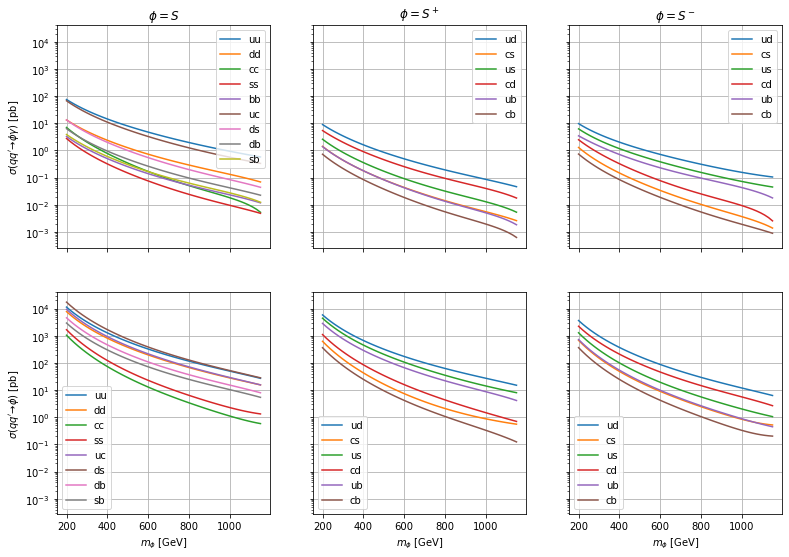

In [13]:
neutralChans = ("uu", "dd", "cc", "ss", "bb", "uc", "ds", "db", "sb")
chargedChans = ("ud", "cs", "us", "cd", "ub", "cb")

coeffs = pd.DataFrame(
    index=[f"{x}Hgam" for x in neutralChans]
    + [f"{x}Hpgam" for x in chargedChans]
    + [f"{x}Hmgam" for x in chargedChans]
    + [f"{x}H" for x in neutralChans]
    + [f"{x}Hp" for x in chargedChans]
    + [f"{x}Hm" for x in chargedChans],
    columns=["c-3", "c-2", "c-1", "c0", "c1"],
    data=np.array(
        [
            [-7.40884e07, 4.49543e06, -6.39061e03, 3.69548, -7.95657e-04],
            [-2.60547e07, 9.77832e05, -1.89561e03, 1.60940, -5.34126e-04],
            [3.63856e07, 2.07310e05, -6.80539e02, 7.11790e-01, -2.56867e-04],
            [1.57635e07, 6.14227e04, -1.84656e02, 1.72986e-01, -5.59835e-05],
            [5.67982e05, 2.01805e05, -4.48806e02, 4.06157e-01, -1.36612e-04],
            [5.65276e07, 3.48162e06, -6.27974e03, 4.49248, -1.19019e-03],
            [1.68853e07, 6.99651e05, -1.51012e03, 1.28013, -4.02750e-04],
            [8.13777e06, 3.30773e05, -7.11803e02, 6.07085e-01, -1.92274e-04],
            [-3.90384e06, 2.79829e05, -6.46173e02, 6.13265e-01, -2.15673e-04],
            [-1.73381e07, 6.52027e05, -1.22317e03, 9.81880e-01, -3.07538e-04],
            [5.33220e06, 5.23319e04, -1.36529e02, 1.25393e-01, -4.09939e-05],
            [3.71034e06, 1.42254e05, -3.51939e02, 3.35395e-01, -1.16551e-04],
            [-1.50520e07, 4.57490e05, -1.00688e03, 9.17357e-01, -3.13157e-04],
            [2.70981e06, 7.26799e04, -1.90285e02, 1.82345e-01, -6.24154e-05],
            [2.84796e06, 2.81458e04, -8.27795e01, 8.22505e-02, -2.85173e-05],
            [-4.71225e05, 4.45930e05, -2.47076e02, -2.16092e-01, 1.73311e-04],
            [6.77824e06, 3.46047e04, -1.04975e02, 1.02024e-01, -3.47606e-05],
            [2.83736e06, 2.96278e05, -3.29227e02, 8.05123e-02, 2.16609e-05],
            [2.87478e06, 1.48855e05, -3.95107e02, 3.92820e-01, -1.40121e-04],
            [-2.48801e07, 3.96466e05, -8.15750e02, 7.75128e-01, -2.88148e-04],
            [3.89650e06, 1.94293e04, -5.75982e01, 5.25333e-02, -1.63540e-05],
            [9.01509e10, 4.18827e07, -245875.0, 254.458, -0.0908537],
            [7.07833e10, -3.84276e7, -42109.9, 58.2871, -0.0205486],
            [1.50538e10, -4.38353e7, 59437.3, -40.8521, 0.0113045e0],
            [+2.34862e10, -6.6938e07, +93341.3, -67.2994, +0.0196796],
            [+5.86328e10, -3.84769e7, -53581.8, 93.5308, -0.0402486],
            [+9.09597e10, -7.52852e7, -37365.5, 87.893, -0.0371667],
            [+1.72313e11, -1.75715e8, -3836.18, 114.545, -0.0551281],
            [+4.19579e10, -1.8564e7, -60170.9, 87.2187, -0.0351971],
            [+2.65898e10, -9.68092e6, -41054.6, 58.3277, -0.0238107],
            [+4.5284e10, +2.86996e7, -132718, 132.009, -0.0460763],
            [+8.91285e9, -2.50802e7, +30539.2, -17.502, +0.00400584],
            [+4.09273e10, -2.50004e7, -21620.2, 26.8752, -0.00701031],
            [+1.43062e10, -3.39139e7, +36824, -20.178, +0.00443296],
            [+2.50754e10, -2.58492e6, -60789.7, 77.2716, -0.0302666],
            [+5.22174e9, -1.48684e7, +18402.6, -10.7985, +0.00237351],
            [+3.35549e10, -1.81981e7, -30947.2, 44.7557, -0.0172376],
            [+9.77269e9, -2.91403e7, +42584.6, -32.2039, +0.00982901],
            [+1.68976e10, -4.22103e7, +51821.8, -33.1287, +0.00863466],
            [+2.25477e10, -2.27075e7, -9033.18, 27.6082, -0.0128189],
            [+9.8114e9, -2.54653e7, +30948.2, -19.4331, +0.00502026],
            [+5.46674e9, -1.69912e7, +24637.7, -18.2229, +0.00543889],
        ]
    ),
).drop(
    index=["bbH"]
)  # we have dedicated computations for that


def fitFun(cs):
    return lambda m: np.sum([v * m ** int(k[1:]) for k, v in cs.items()], axis=0)


cxnFuncs = {k: fitFun(v) for k, v in coeffs.iterrows()}

massGrid = np.linspace(200, 1150)

fig, axs = plt.subplots(figsize=(13, 9), ncols=3, nrows=2, sharex=True, sharey=True)
ax = axs[0, 0]
ax.set_title(r"$\phi=S$")
for k, f in cxnFuncs.items():
    if k.endswith("Hgam"):
        ax.plot(massGrid, f(massGrid), label=k[:2])
ax = axs[0, 1]
ax.set_title(r"$\phi=S^+$")
for k, f in cxnFuncs.items():
    if k.endswith("Hpgam"):
        ax.plot(massGrid, f(massGrid), label=k[:2])
ax = axs[0, 2]
ax.set_title(r"$\phi=S^-$")
for k, f in cxnFuncs.items():
    if k.endswith("Hmgam"):
        ax.plot(massGrid, f(massGrid), label=k[:2])
ax = axs[1, 0]
for k, f in cxnFuncs.items():
    if k.endswith("H"):
        ax.plot(massGrid, f(massGrid), label=k[:2])
ax = axs[1, 1]
for k, f in cxnFuncs.items():
    if k.endswith("Hp"):
        ax.plot(massGrid, f(massGrid), label=k[:2])
ax = axs[1, 2]
for k, f in cxnFuncs.items():
    if k.endswith("Hm"):
        ax.plot(massGrid, f(massGrid), label=k[:2])
for ax in axs.flatten():
    ax.legend()
    ax.set_yscale("log")
    ax.grid()
for ax in axs[1]:
    ax.set_xlabel(r"$m_\phi$ [GeV]")
axs[0, 0].set_ylabel(r"$\sigma(q q' \to \phi \gamma)$ [pb]")
axs[1, 0].set_ylabel(r"$\sigma(q q' \to \phi)$ [pb]")
plt.show()


In [ ]:
def header(key):
    mH = "m" + key[2:]
    if mH.endswith("gam"):
        mH = mH[:-3]
    if "Hp" in key or "Hm" in key:
        coupDecl = f"double gL{key[:2]}, double gR{key[:2]}"
    else:
        coupDecl = f"std::complex<double> g{key[:2]}"
    if "Hp" in key:
        initState = r"{0}\bar{{{1}}}".format(*key)
        particleLatex = r"H^+"
    elif "Hm" in key:
        initState = r"\bar{{{0}}}{1}".format(*key)
        particleLatex = r"H^-"
    else:
        initState = (
            r"{0}\bar{{{1}}}" if key[0] == key[1] else r"{0}\bar{{{1}}}+\bar{{{0}}}{1}"
        ).format(*key)
        particleLatex = "H"

    gam = r"\gamma" if key.endswith("gam") else ""
    return (
        r"//! \f$"
        + r"{} \to {} {}".format(initState, particleLatex, gam)
        + r"\f$"
        + "\n"
        + f"HIGGSTOOLS_EXPORT double {key}(Collider coll, double {mH}, {coupDecl});"
    )


print("\n".join(header(k) for k in coeffs.index))


In [ ]:
def toCppFitFun(cs):
    mH = "m" + cs.name[2:]
    if mH.endswith("gam"):
        mH = mH[:-3]
    if "Hp" in cs.name or "Hm" in cs.name:
        coupDecl = f"double gL{cs.name[:2]}, double gR{cs.name[:2]}"
        coupSquared = f"(std::pow(gL{cs.name[:2]},2) + std::pow(gR{cs.name[:2]},2))"
    else:
        coupDecl = f"std::complex<double> g{cs.name[:2]}"
        coupSquared = f"norm(g{cs.name[:2]})"
    powers = {
        "c-3": f"*std::pow({mH},-3)",
        "c-2": f"*std::pow({mH},-2)",
        "c-1": f"/{mH}",
        "c0": "",
        "c1": f"*{mH}",
    }

    return (
        f"double {cs.name}(Collider coll, double {mH}, {coupDecl}){{"
        + f"if(coll == Collider::LHC13 && validMassIn<Clamp::lower>({mH},{{200.,1150.}})){{"
        + f"return {coupSquared}*("
        + "".join([f"{v:+}{powers[k]}" for k, v in cs.items()])
        + ");}return 0.;}"
    )


print("\n\n".join(toCppFitFun(c) for _, c in coeffs.iterrows()))
